This project is for the class of OPS802. The target of the project is to have a hands on full data analytics experience from A to Z. That means starting with raw data and reading it into python then doing some analytical and statstical observations on the data and finally doing some supervised and unsupervised learning on the data. The data we will use for this project is one of the most famous datasets in the machine learning world which is called IRIS classification dataset. That means there is plenty of resources for you online to learn from and that you are not the first person who saw and analyzed this data. Use this to your advantage. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. We will describe it more in details later. The project measures the capabilities of lodaing data, cleaning it up, running some tests and statistical analysis and finally machine learning. The following highlights the project
-  The project consists of four parts, they are mostly independent and in order based on what we studies in class
-  The deadline of the project is the last day of the quarter
-  The project is individual, however I encourage you to talk to each other to check your different approaches without copying codes or talking about detailed code specific. For example, it is ok to ask about which function you have used to tackle part a and is it better than this other function or not. It is not ok to copy the exact code including that function you asked about.
- You are expected to heavily utilize resources outside the class notebooks such as Google, StackOverflow, .. etc
- Code cleanings and Display has 10% of the grade

# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [1]:
# Solve Here
import pandas as pd
df1=pd.read_csv("iris_not_clean.data", sep="|", header=None) #Loading the file with | separator 
df1

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,# this data is for IRIS,NaN,NaN,NaN,NaN
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...
150,6.7,3.0,5.2,2.3,Iris-virginica
151,6.3,2.5,5.0,1.9,Iris-virginica
152,6.5,3.0,5.2,2.0,Iris-virginica
153,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
#rows and columns number
no_of_rows=len(df1)
no_of_columns=len(df1.columns)
print("nummber of rows:",no_of_rows)
print("number of columns:",no_of_columns)

nummber of rows: 155
number of columns: 5


In [3]:
#number of nulls in the data
df1.isna().sum().sum()

17

In [4]:
 df1.isnull().sum(axis=1)   #each row contain how many nulls

0      0
1      4
2      0
3      0
4      0
      ..
150    0
151    0
152    0
153    0
154    0
Length: 155, dtype: int64

In [5]:
#which row contain nulls
df1[df1.isna().any(axis=1)]

,0,1,2,3,4
1,# this data is for IRIS,NaN,NaN,NaN,NaN
29,5.2,3.4,NaN,0.2,Iris-setosa
30,NaN,NaN,NaN,NaN,NaN
34,#is this correct?,NaN,NaN,NaN,NaN
46,NaN,3.2,2.1,NaN,NaN


In [6]:
df1.isnull().sum(axis = 0)  #how many nans per column

0    2
1    3
2    4
3    4
4    4
dtype: int64

In [7]:
#36th row data
df2=df1.iloc[36]
df2

    

0            5.5
1            4.2
2            1.4
3            0.2
4    Iris-setosa
Name: 36, dtype: object

In [8]:
#replacing the value of 36 th sample to the value of original paper
df1.iloc[[36],[0]]=4.9
df1.iloc[[36],[1]]=3.1
df1.iloc[[36],[2]]=1.5
dff=df1.iloc[36]
dff


0            4.9
1            3.1
2            1.5
3            0.2
4    Iris-setosa
Name: 36, dtype: object

In [9]:
#39th sample
df3=df1.iloc[39]
df3

0            5.5
1            3.5
2            1.3
3            0.2
4    Iris-setosa
Name: 39, dtype: object

In [10]:
#replacing the value of 39th sample
df1.iloc[[39],[0]]=4.9
df1.iloc[[39],[1]]=3.6
df1.iloc[[39],[2]]=1.4
df1.iloc[[39],[3]]=0.1
dff2=df1.iloc[39]
dff2

0            4.9
1            3.6
2            1.4
3            0.1
4    Iris-setosa
Name: 39, dtype: object

# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per class, i.e. grouped by classes

In [11]:
# Solve Here
#mean of each column
mean=df1.mean(numeric_only=True)
print("mean values for each column:\n",mean)
#variance of each column
var=df1.var(numeric_only=True)
print("variance of each column:\n",var)


mean values for each column:
 1    3.050658
2    3.748344
3    1.191391
dtype: float64
variance of each column:
 1    0.178410
2    3.107581
3    0.586525
dtype: float64


In [12]:
#drop the NaN rows
df1.dropna(inplace=True)

In [13]:
#As few values are string, need to convert it to float
df1.iloc[:,:4]= df1.iloc[:,:4].astype(float)

In [14]:
#after droping NAN rows recalculating mean and variance
mean=df1.mean(numeric_only=True)
print("mean values for each column:\n",mean)
#variance of each column
var=df1.var(numeric_only=True)
print("variance of each column:\n",var)



mean values for each column:
 0    5.830000
1    3.047333
2    3.759333
3    1.198000
dtype: float64
variance of each column:
 0    0.707081
1    0.179825
2    3.110080
3    0.583821
dtype: float64


# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


- Use Scipy pdf fitting to do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

Text(0.5, 0, 'The petal length')

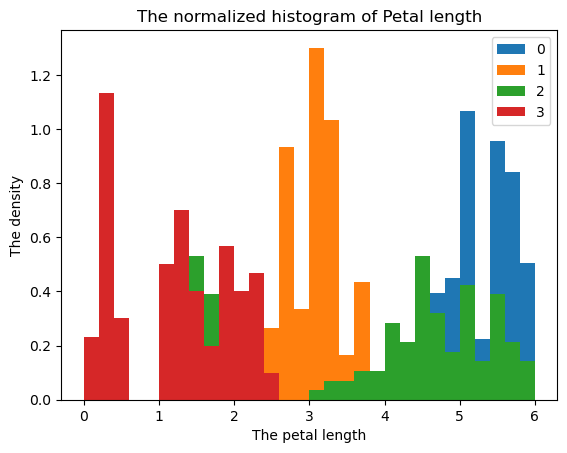

In [15]:
# Solve Here
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

df1.plot.hist(bins=np.arange(0,6 + 0.2,0.2), density=True)
plt.title('The normalized histogram of Petal length')
plt.ylabel('The density')
plt.xlabel('The petal length')

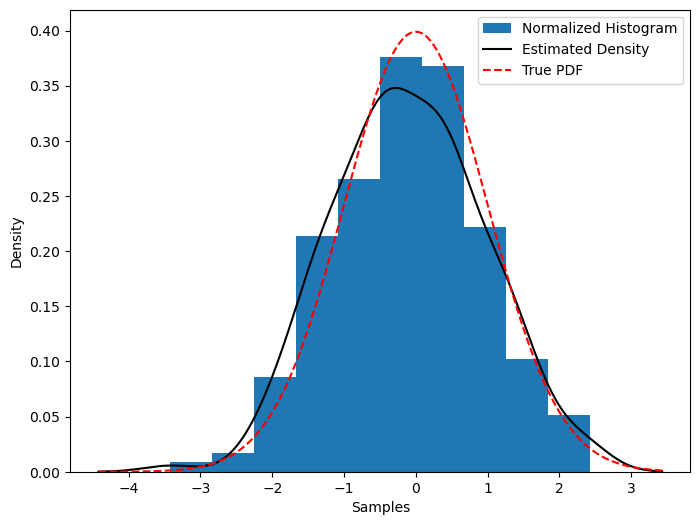

In [16]:

np.random.seed(12456)
x1 = np.random.normal(size=200)  # random data, normal distribution
xs = np.linspace(x1.min()-1, x1.max()+1, 200) # generate the data that we will predict for

kde1 = scipy.stats.gaussian_kde(x1)  # find out the best fit

fig = plt.figure(figsize=(8, 6))

plt.hist(x1, density=True, label='Normalized Histogram')  # rug plot
plt.plot(xs, kde1(xs), 'k-', label="Estimated Density")  # test your fit
plt.plot(xs, scipy.stats.norm.pdf(xs), 'r--', label="True PDF")  # show the real distribution
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend()

In [17]:
#data by taking 500 samples
from scipy.stats import norm
new_data = norm.rvs(3.76, 1.76, size=500)
new_data

array([ 3.43113877,  2.73826566,  2.95780136,  4.17408157,  5.14330473,
        4.5339312 ,  4.34164761,  2.1075821 ,  0.5391266 ,  2.42505967,
       -0.16404973,  0.89033519,  2.7415984 ,  3.45907765,  4.54465635,
        3.00108228,  3.55311267,  2.59918168,  1.28831603,  3.54823994,
        4.02526684,  6.62737924,  1.91430476,  0.87995434,  2.92377427,
        1.87969047,  2.83166763,  5.31184119,  5.32679294,  2.42943483,
        3.69934474,  2.11734133,  6.65206585,  4.58840559,  4.14380964,
        4.7889323 ,  1.14794624,  6.10590365,  3.07611084,  1.27230199,
        6.76879189,  2.49404877,  5.99421719,  1.12038582,  4.54279111,
        3.32865731,  4.20816436,  5.1374508 ,  5.91676273,  4.44975614,
        3.92245563,  5.62999968,  2.02272968,  7.24748068,  3.38391888,
        3.93902383,  5.25626811,  6.81815092,  1.70446491,  6.58297907,
        3.70081264,  2.74795081,  1.6530369 ,  4.22312691,  7.58062627,
        3.46687848,  3.165537  ,  5.23498939,  1.42717818,  2.97

In [18]:
print(np.mean(new_data))#new mean of 500 samples 
#Existing - 3.76 

3.6458945401023706


### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

In [19]:
# Solve Here
data2= df1.drop(df1.columns[4], axis=1) #dropping the 4th column of string then we can work on digits only
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(data2)


In [20]:
pca.get_covariance()

array([[ 0.70708054, -0.0412953 ,  1.30545638,  0.53093289],
       [-0.0412953 ,  0.17982506, -0.30578031, -0.11164966],
       [ 1.30545638, -0.30578031,  3.11008009,  1.29730067],
       [ 0.53093289, -0.11164966,  1.29730067,  0.58382148]])

(150, 4)

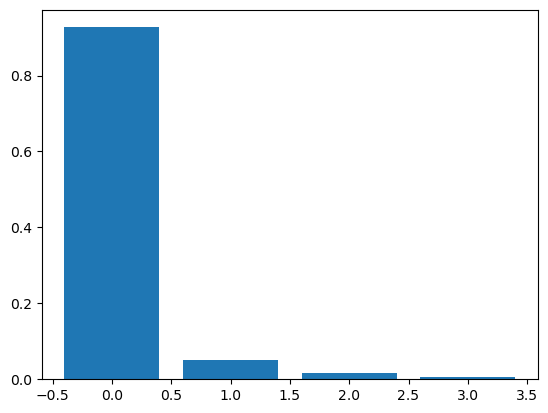

In [21]:

pca_all = PCA()
reduced_data_pca = pca_all.fit_transform(X_new)
pca_all.explained_variance_ratio_
plt.bar(np.arange(4),pca_all.explained_variance_ratio_)
reduced_data_pca.shape

In [22]:
#Use pca to reduced the nummber of attribute to 1
pca=PCA(n_components=1)
X_new=pca.fit_transform(data2)



<BarContainer object of 4 artists>

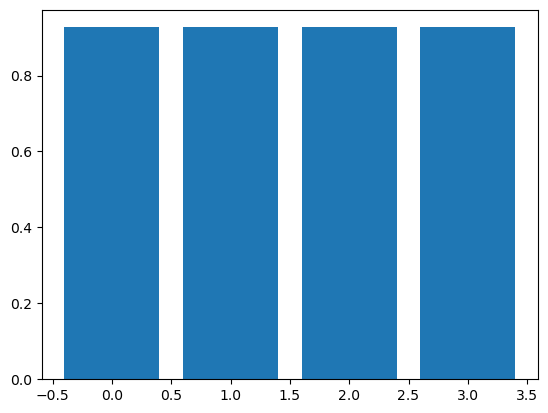

In [23]:
# Inspect the shape
X_new.shape
plt.bar(np.arange(4),pca.explained_variance_ratio_)


# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

[[4.966      3.398      1.466      0.242     ]
 [6.2525     2.855      4.815      1.625     ]
 [6.9125     3.1        5.846875   2.13125   ]
 [5.53214286 2.63571429 3.96071429 1.22857143]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 1 3 1 3 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 2 1 2 2 2 2 3 2 2 2 1
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 1
 2 1]


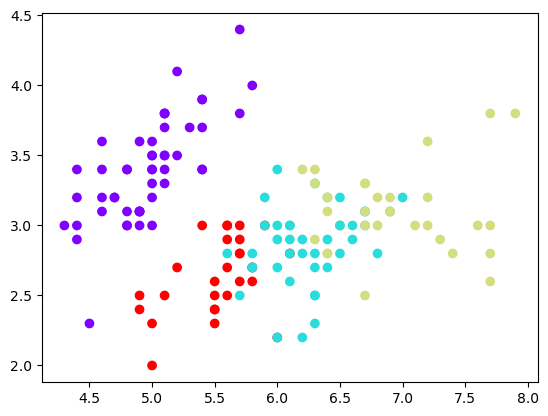

In [24]:
# Solve Here
data=df1.drop(df1.columns[4], axis=1) #here we drop the 4th column of string which will be helpful to make clusters
X=data.to_numpy() #convert dataframe to numpy array
import matplotlib.pyplot as plt
#devide data into different clusters
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=4)  
kmeans.fit(X)  
print(kmeans.cluster_centers_)  
print(kmeans.labels_)  
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  


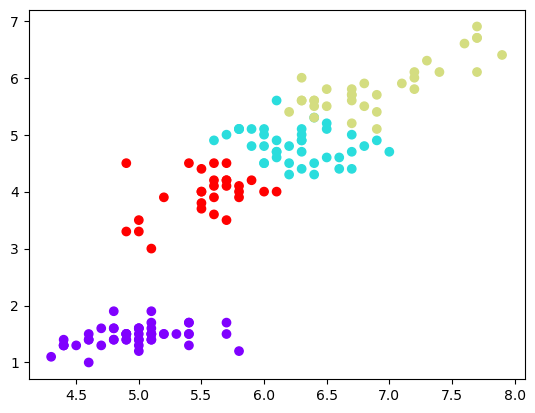

In [25]:
# Solve Here
plt.scatter(X[:,0],X[:,2], c=kmeans.labels_, cmap='rainbow') 



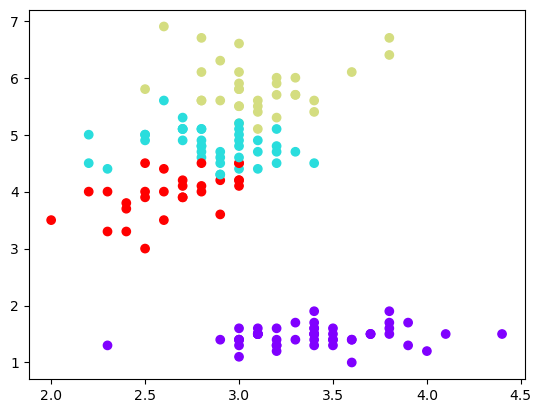

In [26]:
plt.scatter(X[:,1],X[:,2], c=kmeans.labels_, cmap='rainbow')  


### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

In [27]:
# Solve Here
#devide dataset into 80% and 20% validation
from sklearn.model_selection import train_test_split
x=df1.iloc[:,:4]
y=df1.iloc[:,4]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)


In [28]:
#build your model
from sklearn.linear_model import LogisticRegression
my_model=LogisticRegression()


In [29]:
my_model.fit(x_train,y_train)

C:\Users\monma\OneDrive\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
#training accuracy
#test the model
predicted = my_model.predict(x_test)
predicted


array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [31]:
#compare above results with ytest
my_model.score(x_test,y_test)

1.0

In [32]:
#confusion matrix calculation
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted)
cm

array([[ 9,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  8]], dtype=int64)